In [1]:
!python -m pip install pandas

In [2]:
!python -m pip install matplotlib

In [7]:
!python -m pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 1.1 MB/s eta 0:00:00a 0:00:01m


In [5]:
import glob
import os

print(os.getcwd())
root_d = 'recordings'
audio_files = glob.glob(root_d + '/*/*/*.wav')
print(f'# files: {len(audio_files)}\nexample path: {audio_files[0]}')

/home/digitalopt/proj/diarization
# files: 7380
example path: recordings/RT-JJara/2031456_11398_VC_1_1_01_12_2023_15_03_31/136.wav


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import librosa
import librosa.display

import IPython.display as ipd 
from itertools import cycle

import seaborn as sns

sns.set_theme(style='white', palette=None)

length: 97329
 example:[-0.00190448 -0.00434615 -0.00507754 -0.00486129 -0.0040043  -0.00369307
 -0.0037951  -0.00386631 -0.00326354 -0.00239931]
sr: 22050




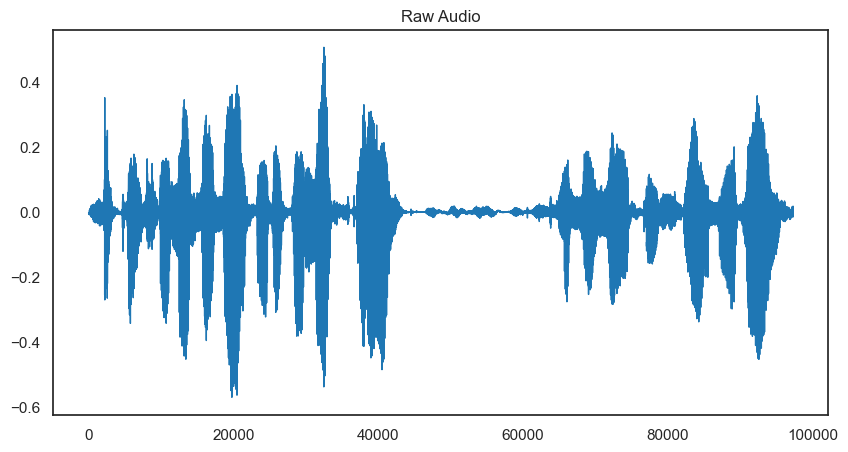

In [36]:
num = 100

wf, sr = librosa.load(audio_files[num])
print(f'length: {len(wf)}\n example:{wf[:10]}\nsr: {sr}\n\n')
pd.Series(wf).plot(figsize=(10,5), lw=1, title='Raw Audio')
ipd.Audio(audio_files[num])

# Spectrogram

In [38]:
d = librosa.stft(wf)
s_db = librosa.amplitude_to_db(np.abs(d), ref=np.max)
print(f'sample in decibals, size: {s_db.shape}')

sample in decibals, size: (1025, 191)


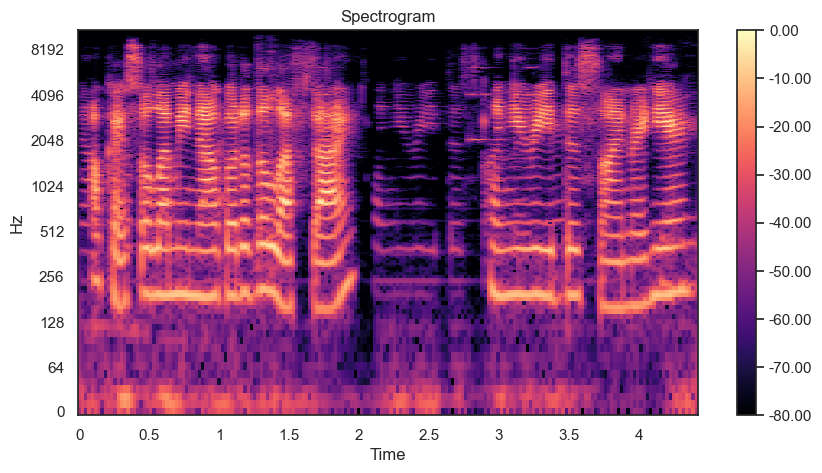

In [41]:
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(s_db, x_axis='time', y_axis='log', ax=ax)
ax.set_title('Spectrogram')
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

# Mel Spectrogram

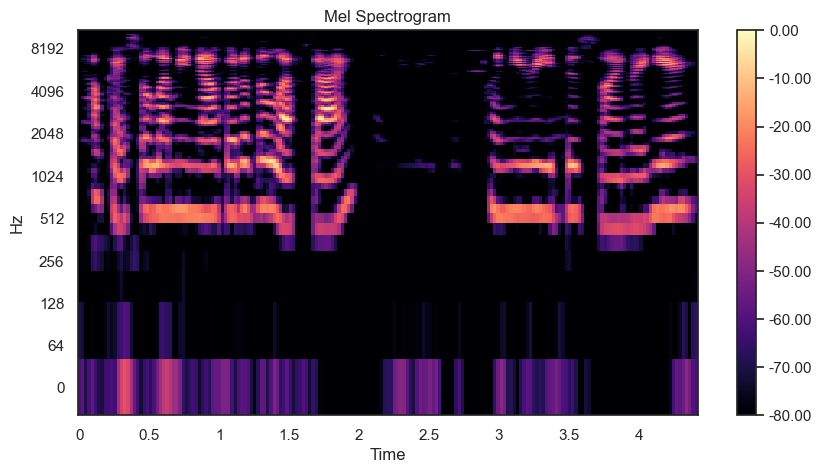

In [44]:
s = librosa.feature.melspectrogram(y=wf, sr=sr, n_mels=128)
s_db_mel = librosa.amplitude_to_db(s, ref=np.max)

fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(s_db_mel, x_axis='time', y_axis='log', ax=ax)
ax.set_title('Mel Spectrogram')
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()